##Tahap 1: Import Library

 **Persiapan dan Instalasi**

In [1]:
!pip install kaggle -q # Install the Kaggle API client, -q untuk quiet installation

import os # Mengimpor modul os untuk berinteraksi dengan sistem operasi, seperti mengelola file dan direktori
import matplotlib.pyplot as plt # Mengimpor library matplotlib untuk plotting dan visualisasi data
import matplotlib.image as mpimg # Mengimpor modul mpimg untuk membaca dan menampilkan gambar
import numpy as np # Mengimpor library numpy untuk operasi numerik, terutama array multidimensi
import tensorflow as tf # Mengimpor library TensorFlow untuk membangun dan melatih model deep learning

from tensorflow.keras.applications import MobileNetV2 # Mengimpor MobileNetV2, arsitektur model pre-trained untuk klasifikasi gambar
from tensorflow.keras.layers import Input, Conv2D, Dropout, BatchNormalization # Mengimpor layer-layer untuk membangun model CNN
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense # Mengimpor layer-layer lanjutan untuk model CNN
from tensorflow.keras import models # Mengimpor modul models untuk membuat dan mengelola model Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Mengimpor ImageDataGenerator untuk augmentasi data dan preprocessing gambar

from google.colab import files # Mengimpor modul files untuk mengupload dan mendownload file di Google Colab
from PIL import Image # Mengimpor library PIL (Pillow) untuk manipulasi gambar
import pathlib # Mengimpor modul pathlib untuk manipulasi path file dan direktori, lebih object-oriented

##Tahap 2: Load & Unduh Dataset

 **Mengunduh dataset "Rice Image Dataset - Train Test Split" dari Kaggle.**

In [2]:
# Unggah file kaggle.json Anda
files.upload()

!mkdir -p ~/.kaggle # Buat direktori Kaggle
!cp kaggle.json ~/.kaggle/ # Salin file kaggle.json ke direktori Kaggle
!chmod 600 ~/.kaggle/kaggle.json # Ubah izin file kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
# Unduh dataset
!kaggle datasets download -d ayanwap7/rice-image-dataset-train-test-split

Dataset URL: https://www.kaggle.com/datasets/ayanwap7/rice-image-dataset-train-test-split
License(s): unknown


In [4]:
# Mengekstrak file zip dataset 'rice-image-dataset-train-test-split.zip'
# -qq digunakan untuk mode senyap agar tidak menampilkan output yang detail
!unzip -qq rice-image-dataset-train-test-split.zip

In [5]:
# Mendefinisikan path direktori dataset
rice = 'Rice_Image_Dataset/'
train_dir = os.path.join(rice, 'train') # Path ke direktori train
test_dir = os.path.join(rice, 'test') # Path ke direktori test

# Mendapatkan daftar kelas beras dari direktori test
classes = os.listdir(test_dir)
total = 0 # Inisialisasi total gambar

# Menghitung jumlah gambar di setiap kelas dan total gambar
for name_class in classes:
  class_path = os.path.join(test_dir, name_class) # Path ke direktori kelas
  total_images = len(os.listdir(class_path)) # Jumlah gambar di kelas tersebut
  print(f"{class_path} : {total_images}") # Menampilkan jumlah gambar di setiap kelas
  total += total_images # Menambahkan jumlah gambar ke total

print(total) # Menampilkan total gambar di semua kelas
list_rice = os.listdir(test_dir) # Mendapatkan daftar nama kelas beras

Rice_Image_Dataset/test/Ipsala : 3000
Rice_Image_Dataset/test/Karacadag : 3000
Rice_Image_Dataset/test/Basmati : 3000
Rice_Image_Dataset/test/Arborio : 3000
Rice_Image_Dataset/test/Jasmine : 3000
15000


In [6]:
print(list_rice) # Menampilkan daftar nama kelas beras

['Ipsala', 'Karacadag', 'Basmati', 'Arborio', 'Jasmine']


Shape gambar: (250, 250, 3)
Shape gambar: (250, 250, 3)
Shape gambar: (250, 250, 3)


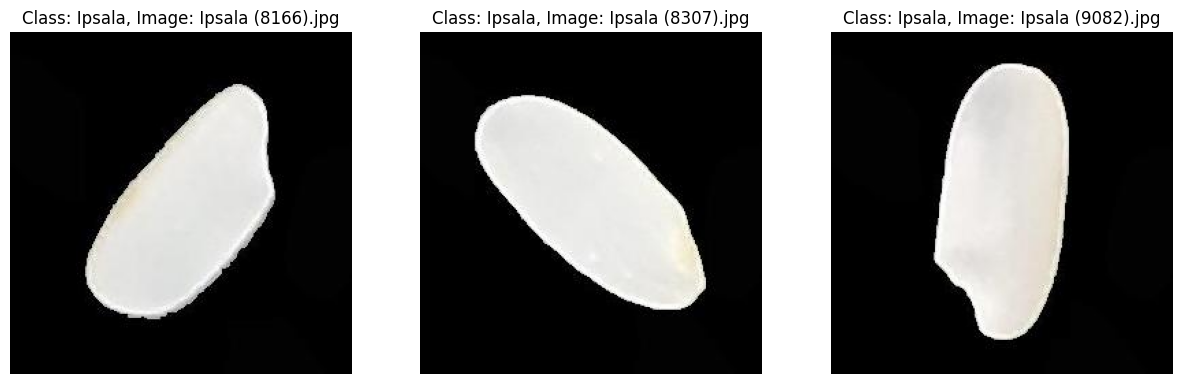

Shape gambar: (250, 250, 3)
Shape gambar: (250, 250, 3)
Shape gambar: (250, 250, 3)


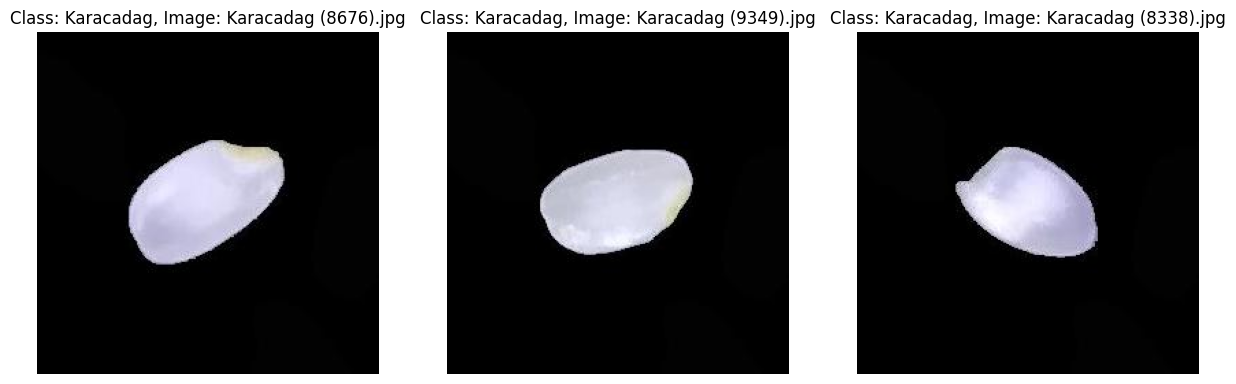

Shape gambar: (250, 250, 3)
Shape gambar: (250, 250, 3)
Shape gambar: (250, 250, 3)


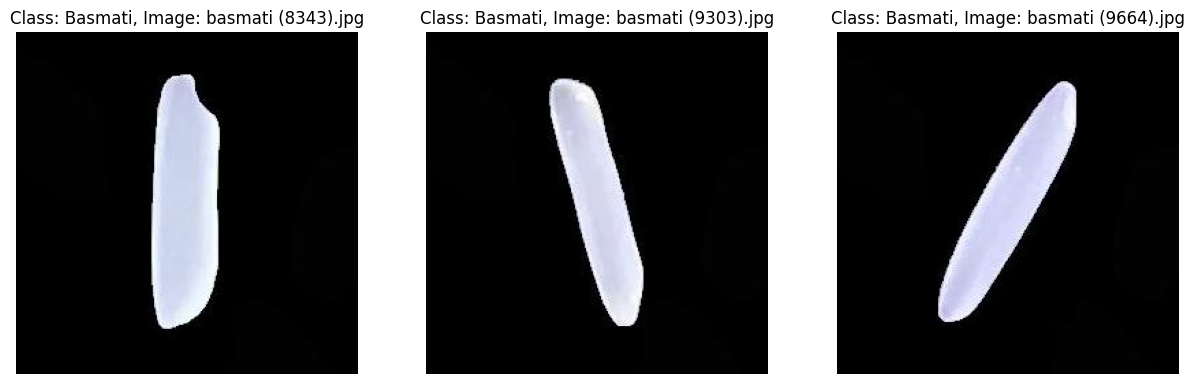

Shape gambar: (250, 250, 3)
Shape gambar: (250, 250, 3)
Shape gambar: (250, 250, 3)


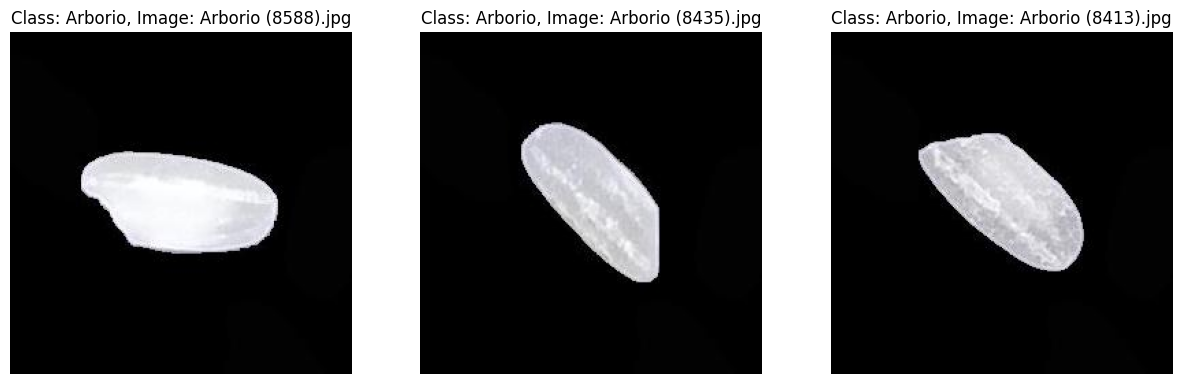

Shape gambar: (250, 250, 3)
Shape gambar: (250, 250, 3)
Shape gambar: (250, 250, 3)


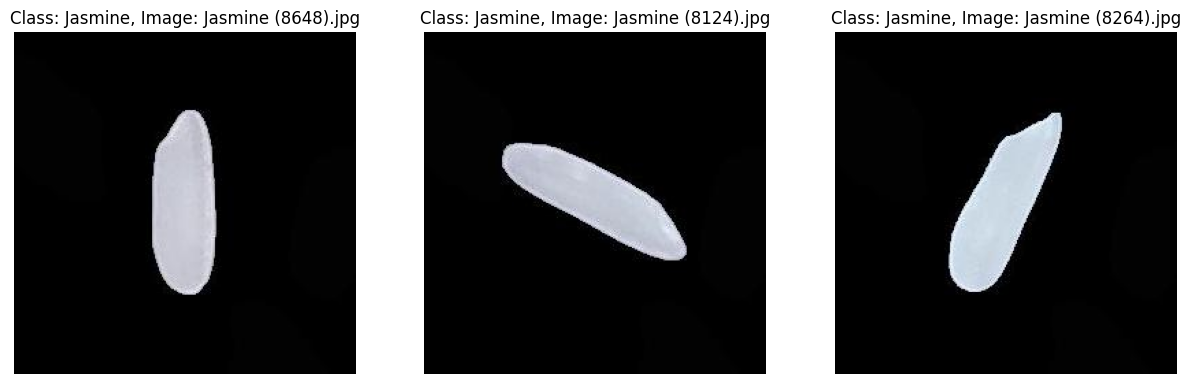

In [7]:
# Menentukan jumlah kolom untuk subplot (misalnya, 3 kolom)
num_cols = 3

# Menampilkan preview gambar dari setiap kelas
for class_name in classes:
    class_path = os.path.join(test_dir, class_name)
    image_files = os.listdir(class_path)

    # Menampilkan maksimal 3 gambar per kelas
    num_images = min(num_cols, len(image_files))
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5)) # Membuat subplot

    for i in range(num_images):
        image_path = os.path.join(class_path, image_files[i])
        img = mpimg.imread(image_path)

        # Menampilkan ukuran/shape gambar
        print(f"Shape gambar: {img.shape}")

        axes[i].imshow(img) # Menampilkan gambar pada subplot
        axes[i].set_title(f"Class: {class_name}, Image: {image_files[i]}")
        axes[i].axis('off')

    plt.show()

##Tahap 3: Data PreProcessing

 **Mengubah ukuran Gambar**

In [8]:
class_rice = len(list_rice) # Mendapatkan jumlah kelas beras
shape = 150,150 # Menentukan ukuran gambar (tinggi, lebar)
batch_size = 256 # Menentukan ukuran batch

Shape gambar setelah diubah: (150, 150, 3)
Shape gambar setelah diubah: (150, 150, 3)
Shape gambar setelah diubah: (150, 150, 3)


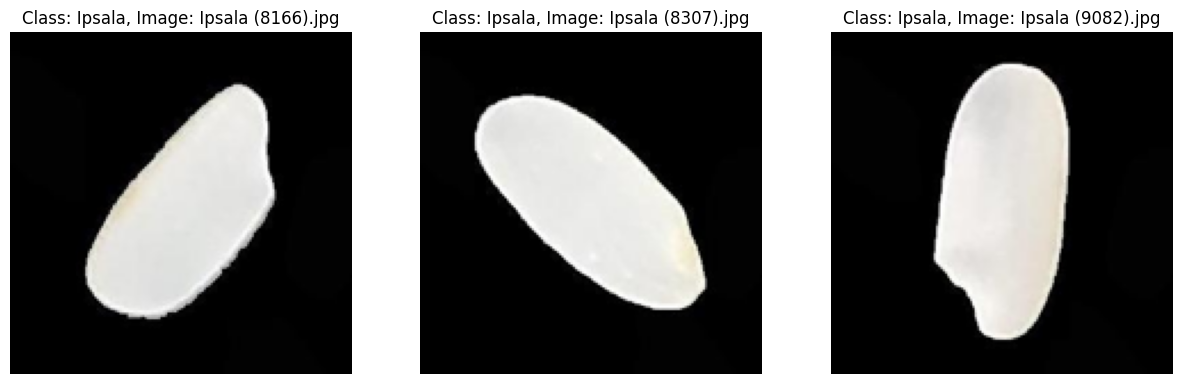

Shape gambar setelah diubah: (150, 150, 3)
Shape gambar setelah diubah: (150, 150, 3)
Shape gambar setelah diubah: (150, 150, 3)


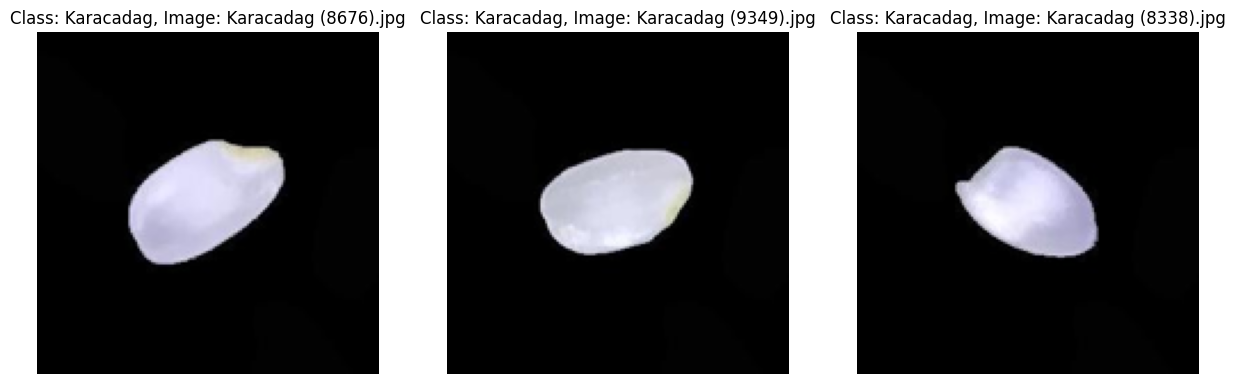

Shape gambar setelah diubah: (150, 150, 3)
Shape gambar setelah diubah: (150, 150, 3)
Shape gambar setelah diubah: (150, 150, 3)


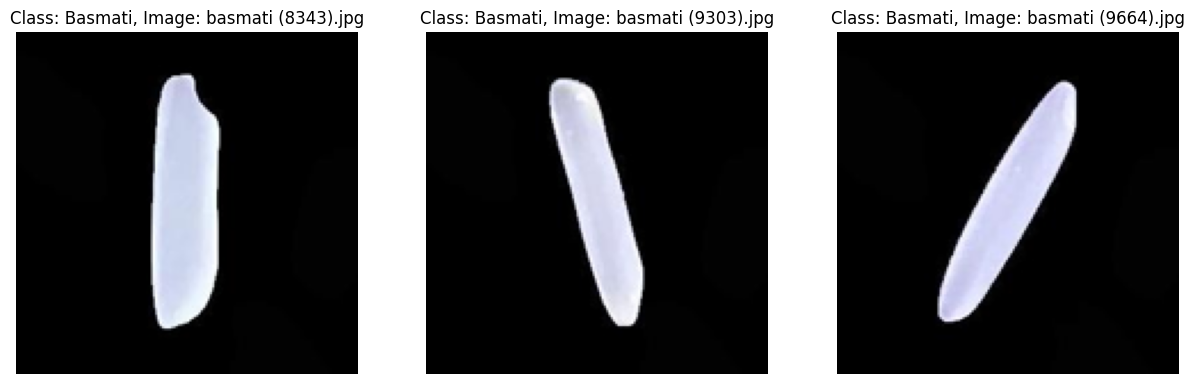

Shape gambar setelah diubah: (150, 150, 3)
Shape gambar setelah diubah: (150, 150, 3)
Shape gambar setelah diubah: (150, 150, 3)


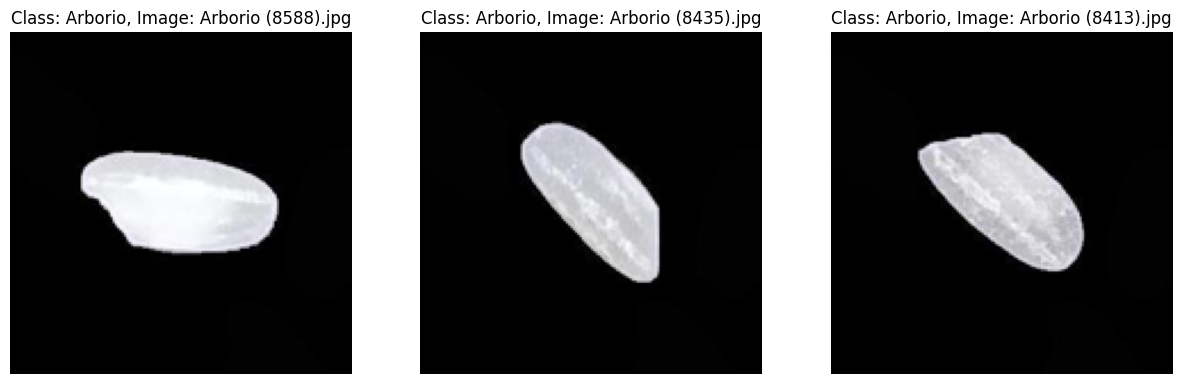

Shape gambar setelah diubah: (150, 150, 3)
Shape gambar setelah diubah: (150, 150, 3)
Shape gambar setelah diubah: (150, 150, 3)


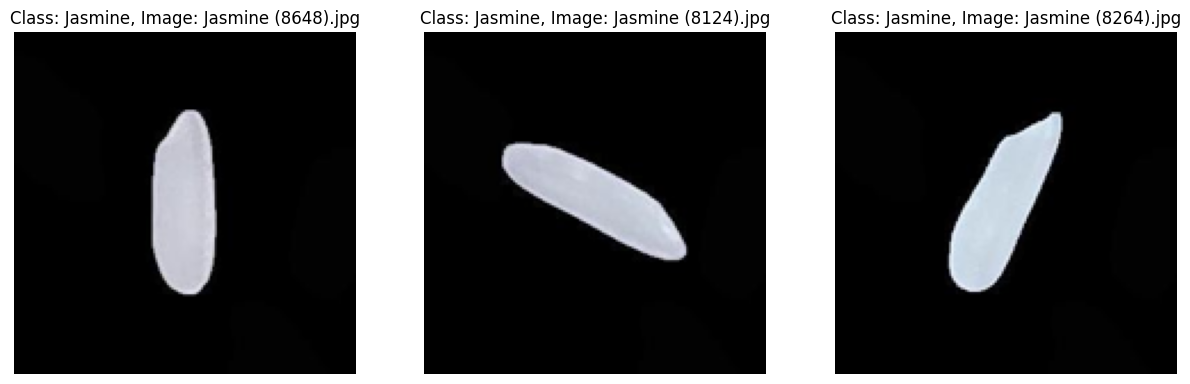

In [9]:
# Menentukan jumlah kolom untuk subplot (misalnya, 3 kolom)
num_cols = 3

# Menampilkan preview gambar dari setiap kelas
for class_name in classes:
    class_path = os.path.join(test_dir, class_name)
    image_files = os.listdir(class_path)

    # Menampilkan maksimal 3 gambar per kelas
    num_images = min(num_cols, len(image_files))
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5)) # Membuat subplot

    for i in range(num_images):
        image_path = os.path.join(class_path, image_files[i])

        # Buka gambar menggunakan PIL
        img = Image.open(image_path)

        # Ubah ukuran gambar
        img = img.resize(shape) # Gunakan variabel shape yang sudah didefinisikan

        # Konversi gambar PIL ke array NumPy untuk ditampilkan dengan Matplotlib
        img_array = np.array(img)


        # Menampilkan ukuran/shape gambar setelah diubah
        print(f"Shape gambar setelah diubah: {img_array.shape}")

        axes[i].imshow(img_array) # Menampilkan gambar pada subplot
        axes[i].set_title(f"Class: {class_name}, Image: {image_files[i]}")
        axes[i].axis('off')

    plt.show()


##Tahap 4: Data Splitting

**Di dalam tahapan ini terdapat, Image Generator yang menghasilkan data saat pelatihan, menghemat memori & waktu.
Data Splitting yang membagi data menjadi training, validation, testing. Serta Augmentasi Data yang memvariasikan data (rotasi, flip, dll.) untuk memperbanyak data & model lebih robust.**

In [10]:
# Membuat objek ImageDataGenerator untuk data training dengan augmentasi
Train_datagen = ImageDataGenerator(
    rotation_range=30, # Rentang rotasi acak dalam derajat
    width_shift_range=0.2, # Rentang pergeseran lebar secara horizontal
    height_shift_range=0.2, # Rentang pergeseran tinggi secara vertikal
    shear_range=0.2, # Rentang shear (geser miring)
    horizontal_flip=True, # Melakukan flip horizontal secara acak
    fill_mode="nearest", # Metode pengisian piksel kosong setelah transformasi
    rescale=1./255, # Menskalakan nilai piksel menjadi 0-1
    validation_split=0.15 # Proporsi data yang digunakan untuk validasi
)

# Membuat objek ImageDataGenerator untuk data testing (hanya rescaling)
Test_datagen = ImageDataGenerator(rescale=1./255) # Menskalakan nilai piksel menjadi 0-1

In [11]:
train_generator = Train_datagen.flow_from_directory(
    train_dir, # Direktori data training
    target_size=shape, # Ukuran gambar yang diinginkan
    batch_size=batch_size, # Ukuran batch
    class_mode="categorical", # Mode kelas (categorical untuk multi-class)
    shuffle=True, # Mengacak data training
    subset="training" # Menentukan subset data sebagai 'training'
)

validation_generator = Train_datagen.flow_from_directory(
    train_dir, # Direktori data training
    target_size=shape, # Ukuran gambar yang diinginkan
    batch_size=batch_size, # Ukuran batch
    class_mode="categorical", # Mode kelas (categorical untuk multi-class)
    shuffle=False, # Tidak mengacak data validasi
    subset="validation" # Menentukan subset data sebagai 'validation'
)

test_generator = Test_datagen.flow_from_directory(
    test_dir, # Direktori data testing
    target_size=shape, # Ukuran gambar yang diinginkan
    batch_size=batch_size, # Ukuran batch
    class_mode="categorical", # Mode kelas (categorical untuk multi-class)
    shuffle=False # Tidak mengacak data testing
)

Found 51000 images belonging to 5 classes.
Found 9000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


##Tahap 5: Modelling

 **Mendefinisikan arsitektur model, termasuk jenis model, layer, dan koneksi antar layer serta
Membangun fondasi model untuk mempelajari pola dari data.**

In [12]:
# Membuat model dasar MobileNetV2 dengan bobot imagenet dan tanpa top layer
base_model = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3)))

# Mengunci semua layer pada model dasar
for layer in base_model.layers:
    layer.trainable = False

# Mendefinisikan arsitektur model
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x) # Layer Konvolusi 1
x = Dropout(0.4)(x) # Layer Dropout 1
x = BatchNormalization()(x) # Layer Batch Normalization 1
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x) # Layer Konvolusi 2
x = Dropout(0.4)(x) # Layer Dropout 2
x = BatchNormalization()(x) # Layer Batch Normalization 2
x = MaxPooling2D((2, 2))(x) # Layer Max Pooling
x = Flatten(name="flatten")(x) # Layer Flatten
x = Dense(128, activation="relu")(x) # Layer Dense 1
x = Dropout(0.25)(x) # Layer Dropout 3
x = BatchNormalization()(x) # Layer Batch Normalization 3
x = Dense(64, activation="relu")(x) # Layer Dense 2
x = Dense(class_rice, activation='softmax')(x) # Layer Output

# Membuat model dengan input dari model dasar dan output dari arsitektur yang telah didefinisikan
model = models.Model(base_model.input, x)

# Mengompilasi model dengan optimizer 'adam', loss 'categorical_crossentropy', dan metrik 'accuracy'
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

<ipython-input-12-e85ed57f0daf>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 75, 75, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 75, 75, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 75, 75, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 75, 75, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 75, 75, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 75, 75, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 75, 75, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 75, 75, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 75, 75, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 75, 75, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 75, 75, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 77, 77, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 38, 38, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 3,284,613 (12.53 MB)

 Trainable params: 1,025,733 (3.91 MB)

 Non-trainable params: 2,258,880 (8.62 MB)

Callback:
Fungsi yang dijalankan selama training untuk memantau dan mengontrol proses, seperti early stopping, penjadwalan learning rate, dll.

In [13]:
accuracy_threshold = 0.95 # Menetapkan ambang batas akurasi
class myCallback(tf.keras.callbacks.Callback): # Membuat kelas callback custom
    def on_epoch_end(self, epoch, logs={}): # Fungsi yang dijalankan di akhir setiap epoch
        if logs.get('accuracy') >= accuracy_threshold and logs.get('val_accuracy') >= accuracy_threshold: # Memeriksa apakah akurasi dan val_accuracy mencapai ambang batas
            print(f'\nEpoch {epoch}: Training dihentikan karena akurasi mencapai {accuracy_threshold * 100}%') # Mencetak pesan jika ambang batas tercapai
            self.model.stop_training = True # Menghentikan training

callbacks = myCallback() # Membuat instance dari kelas callback

##Tahap 6: Training Model

**Proses model "belajar" dari data training untuk mengoptimalkan bobot dan bias**

In [14]:
epochs = 2 # Menentukan jumlah epoch training

hist = model.fit(train_generator,
              epochs=epochs,
              steps_per_epoch = train_generator.samples // batch_size,
              validation_data = validation_generator,
              validation_steps = validation_generator.samples // batch_size,
              verbose = 1) # Menampilkan progres training

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)


199/199 ━━━━━━━━━━━━━━━━━━━━ 2144s 11s/step - accuracy: 0.8974 - loss: 0.2942 - val_accuracy: 0.9779 - val_loss: 0.0669
Epoch 2/2
  1/199 ━━━━━━━━━━━━━━━━━━━━ 25:30 8s/step - accuracy: 0.9844 - loss: 0.0458

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


199/199 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.9844 - loss: 0.0458 - val_accuracy: 0.9790 - val_loss: 0.0634


##Tahap 7: Evaluasi

**Mengukur kinerja model pada data testing yang belum pernah dilihat sebelumnya dan Menggunakan metrik seperti akurasi, presisi, recall, dll. untuk menilai kinerja model.**

In [15]:
test_loss, test_acc = model.evaluate(test_generator) # Mengevaluasi model pada data testing
print(f'Test Accuracy: {test_acc * 100:.2f}%') # Menampilkan akurasi testing

59/59 ━━━━━━━━━━━━━━━━━━━━ 417s 7s/step - accuracy: 0.9469 - loss: 0.1405
Test Accuracy: 95.29%


**Memvisualisasikan performa model selama training dan testing untuk Membantu memahami perilaku model dan mengidentifikasi potensi masalah seperti overfitting**

In [16]:
hist.history['test_accuracy'] = test_acc # Menyimpan akurasi testing ke dalam history
hist.history['test_loss'] = test_loss # Menyimpan loss testing ke dalam history

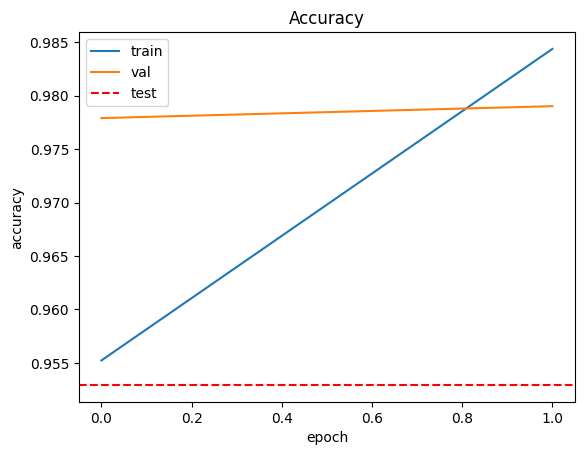

In [17]:
# Plot akurasi training dan validasi
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

# Plot garis horizontal untuk akurasi testing
plt.axhline(y=test_acc, color='r', linestyle='--')

# Tambahkan judul, label sumbu, dan legenda
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'test'], loc='upper left')

# Menampilkan plot
plt.show()

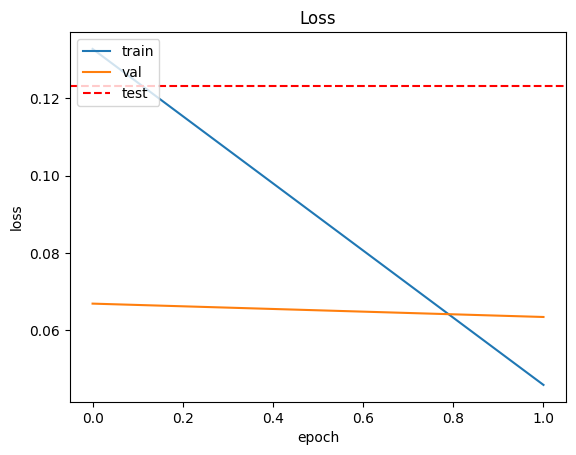

In [18]:
plt.plot(hist.history['loss']) # Plot loss training
plt.plot(hist.history['val_loss']) # Plot loss validasi
plt.axhline(y=test_loss, color='r', linestyle='--') # Plot garis horizontal untuk loss testing
plt.title('Loss') # Menambahkan judul plot
plt.ylabel('loss') # Menambahkan label sumbu y
plt.xlabel('epoch') # Menambahkan label sumbu x
plt.legend(['train', 'val', 'test'], loc='upper left') # Menambahkan legenda
plt.show() # Menampilkan plot

##Tahap 8: Save Model

**Menyimpan model yang telah dilatih dalam berbagai format (SavedModel, TensorFlow Lite, TensorFlow.js) untuk penggunaan kembali model tanpa perlu melatih ulang**

In [19]:
os.mkdir("model_save") # Membuat direktori 'model_save'

export_dir = 'model_save/' # Mendefinisikan path direktori untuk menyimpan model
tf.saved_model.save(model, export_dir) # Menyimpan model ke direktori 'model_save'

In [20]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir) # Membuat objek converter dari saved model
tflite_model = converter.convert() # Mengkonversi model ke format tflite

tflite_model_file = pathlib.Path('model.tflite') # Mendefinisikan path untuk file tflite
tflite_model_file.write_bytes(tflite_model) # Menyimpan model tflite ke file

197816

In [21]:
os.system("pip install tensorflowjs") # Menginstal library TensorFlow.js
os.makedirs("tfjs_model", exist_ok=True) # Membuat direktori "tfjs_model" jika belum ada
os.system("tensorflowjs_converter --input_format=tf_saved_model model_save tfjs_model") # Mengkonversi model ke format TensorFlow.js

0

In [22]:
labels = list(train_generator.class_indices.keys()) # Mendapatkan daftar label kelas

with open("label.txt", "w") as f: # Membuka file "label.txt" dalam mode write ("w")
    for i, label in enumerate(labels): # Iterasi melalui label dengan indeks
        f.write(f"{i} {label}\n") # Menulis indeks dan label ke file